#### This script finds particles that meet certain criterias from selected particles in a tomogram

In [1]:
from EMAN2 import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### load metadata corresponding to a tomogram

db=js_open_dict(info_name("tomograms/tomoa__bin2.hdf"))
print(db.keys())
print(db["class_list"])
apix=db["apix_unbin"]
print(apix)

[u'defocus', u'curves', u'tlt_params', u'class_list', u'ali_loss', u'phase', u'voltage', u'apix_unbin', u'cs', u'boxes_3d', u'tlt_file']
{u'1': {u'name': u'ribo', u'boxsize': 64}, u'0': {u'name': u'init', u'boxsize': 128}, u'3': {u'name': u'ribo_bad', u'boxsize': 128}, u'2': {u'name': u'ribo_good', u'boxsize': 128}, u'5': {u'name': u'ribo_nnet', u'boxsize': 64}, u'7': {u'name': u'neighbor2', u'boxsize': 64}, u'6': {u'name': u'neighbor', u'boxsize': 64}}
3.92999982834


741


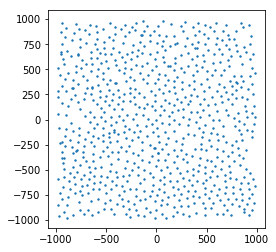

In [3]:
### find particles of a label

boxall=db["boxes_3d"]
box=[b[:3] for b in boxall if b[-1]==5]
print(len(box))
box2=np.array(box)
plt.scatter(box2[:,0], box2[:,1], s=2)
plt.axis("square");
# print(box)

In [4]:
### library for distance calculation
import scipy.spatial.distance as scipydistance

In [5]:
### plot gray scale images later 
plt.gray()

<Figure size 432x288 with 0 Axes>

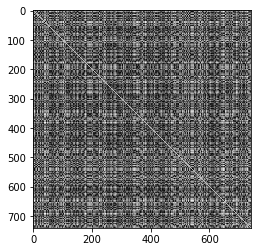

In [6]:
### distance matrix between particles

dst=scipydistance.cdist(box2, box2)
dst=dst+np.eye(len(dst))*2000

plt.imshow(dst)

(array([  20.,   14.,    0.,    7.,   46.,  248.,  265.,  110.,   25.,    6.]),
 array([ 16.97056275,  23.89209104,  30.81361934,  37.73514764,
         44.65667593,  51.57820423,  58.49973252,  65.42126082,
         72.34278911,  79.26431741,  86.18584571]),
 <a list of 10 Patch objects>)

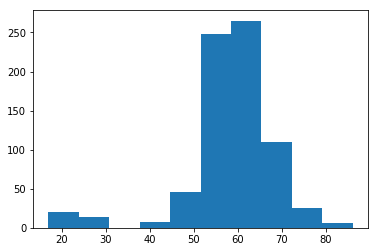

In [7]:
### nearest neighbor distance

nndst=np.min(dst, axis=0)
plt.hist(nndst)

In [8]:
### find particles with a neighbor in 30-50 pixels

idx=np.where((nndst<50)*(nndst>30))[0]
box3=box2[idx]


In [9]:
### append the particles to the current particle list and give it a new label

boxout=[[b[0], b[1], b[2], "neighbor2", 0, 7] for b in box3]
boxall=db["boxes_3d"]
boxall.extend(boxout)

cls=db["class_list"]
cls['7']={"boxsize":64, "name":"neighbor2"}

db["boxes_3d"]=boxall
db["class_list"]=cls
db.close()

In [13]:
### this part calculates the length of each curve annotated in a tomogram

cv=np.array(db["curves"])
idx=np.unique(cv[:,3])
for i in idx:
    pts=cv[cv[:,3]==i, :3]
    d=pts[:,:-1]-pts[:,1:]
    print(i, np.sum(np.linalg.norm(d, axis=1)))
    

(0.0, 3864.678014278843)
(1.0, 4520.4733621073883)
(2.0, 1992.2294631377063)
(3.0, 1488.379549354966)
